# 데이터 정제 연습

In [151]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_im

#jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
# seabornd에서 한글 깨짐 해결 : unicode minus 사용 않기 위한 설정 (minus 깨짐 방지) 
plt.rcParams['axes.unicode_minus']=False 

import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

In [45]:
df=pd.read_csv("/home/piai/Downloads/FITNESS_결측.csv", engine='python',encoding = 'cp949') #한국어 나타내기 
df

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


In [51]:
df.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [50]:
df.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [49]:
df.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [53]:
df["GENDER"].fillna("여성",inplace=True)
df.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [54]:
df.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [57]:
df["WEIGHT"]=\
    df["WEIGHT"].fillna(df.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


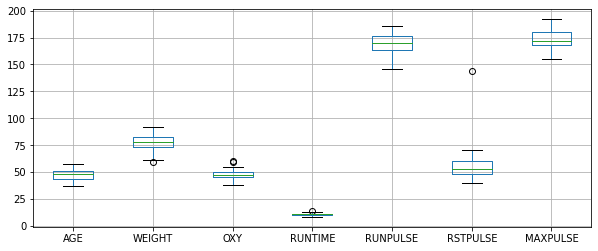

In [59]:
df.boxplot(figsize=(10,4))

In [60]:
df["RSTPULSE"]>=100
df.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [61]:
df[(df["RSTPULSE"]>=100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [62]:
df_fitness=df[df["RSTPULSE"]<100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [63]:
df_fitness.reset_index(drop=True,inplace=True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [73]:
df_fitness_num=df_fitness.select_dtypes(exclude="object")
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [66]:
df_fitness_char=df_fitness.select_dtypes(include="object")
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [78]:
df_scale_std=scale(df_fitness_num)
df_scale_std=pd.DataFrame(df_scale_std,columns=df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [80]:
df_scale_desc=df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [83]:
df_scale_minmax=minmax_scale(df_fitness_num)
df_scale_minmax=pd.DataFrame(df_scale_minmax, columns=df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [84]:
df_scale_desc=df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [85]:
df_scale_robust=robust_scale(df_fitness_num)
df_scale_robust=pd.DataFrame(df_scale_robust,columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [87]:
df_scale_desc=df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [91]:
df_rstpulse=pd.DataFrame()
df_rstpulse["Raw"]=df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"]=df_fitness_num["RSTPULSE"]
df_rstpulse["MinMax"]=df_fitness_num["RSTPULSE"]
df_rstpulse["Robust"]=df_fitness_num["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,40,40,40
1,48,48,48,48
2,45,45,45,45
3,48,48,48,48
4,44,44,44,44


In [92]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,53.767,53.767,53.767
std,7.542,7.542,7.542,7.542
min,40.000,40.000,40.000,40.000
25%,48.000,48.000,48.000,48.000
50%,52.500,52.500,52.500,52.500
75%,58.750,58.750,58.750,58.750
max,70.000,70.000,70.000,70.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77889045b0>,
      dtype=object)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


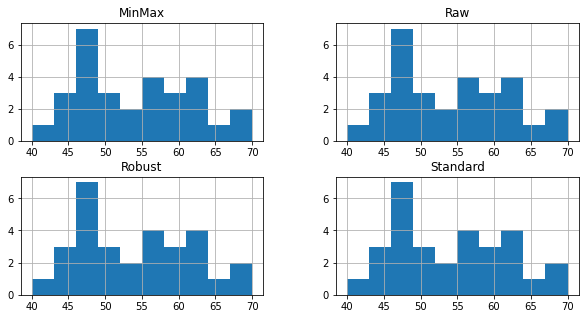

In [94]:
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize=(10,5))

# 탐색적 분석 
#### 시각화, 통계분석을 이용 > 데이터의 패턴, 특성 및 변수간의 관계 파악하며 데이터를 종합적으로 이해하는 과정
#### 인포그래픽 
#### 고려사항 : 1) 무엇을 알기를 원하는가 2) 어떤 탐색적 도구를 활용하면 알 수 있는가 3) 분석 결과에 대한 조치는 
#### 데이터 특성과 목적에 따라 적합한 그래프 선택 (데이터 타입의 이해, 통계 툴 선택) 
#### 범주형 --- 차트 

In [209]:
df_fitness=pd.read_csv("/home/piai/Downloads/3/FITNESS.csv", engine='python',encoding='cp949')
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


In [116]:
df_fitness["GENDER"].fillna("여성",inplace=True)
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


# 1. Bar chart 
#### 1) 범주형에서 가능하다.
#### 2) 동일한 단위를 사용해야 함 

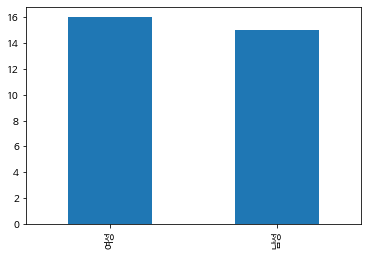

In [152]:
df_count=df_fitness["GENDER"].value_counts()
df_count.plot.bar()

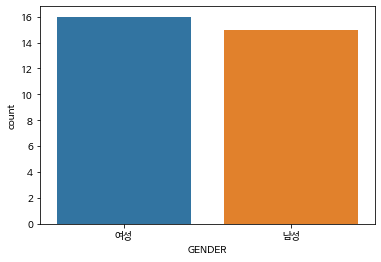

In [153]:
sns.countplot(x='GENDER', data=df_fitness)

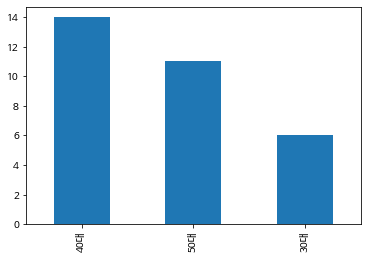

In [154]:
df_count=df_fitness["AGEGROUP"].value_counts()
df_count.plot.bar()

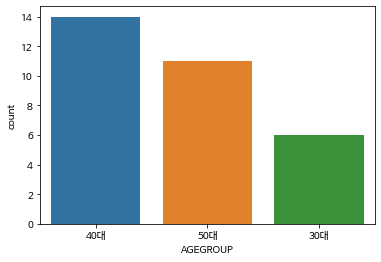

In [155]:
sns.countplot(x="AGEGROUP", data=df_fitness, 
             order= df_fitness["AGEGROUP"].value_counts().index)

In [130]:
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
# seaborn에서 한글 깨짐 해결 : unicode minus 사용 않기 위한 설정 (minus 깨짐 방지) 
plt.rcParams['axes.unicode_minus']=False 

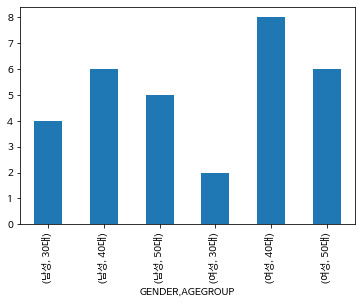

In [156]:
df_groupby_total=df_fitness.groupby(["GENDER","AGEGROUP"], as_index=False).size()
df_groupby_total.plot.bar()

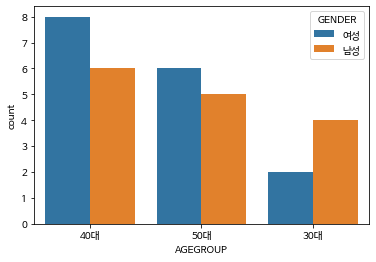

In [157]:
sns.countplot(x="AGEGROUP", hue="GENDER", 
             data=df_fitness,
             order=df_fitness["AGEGROUP"].value_counts().index)

# 2. Histogram 그리기 

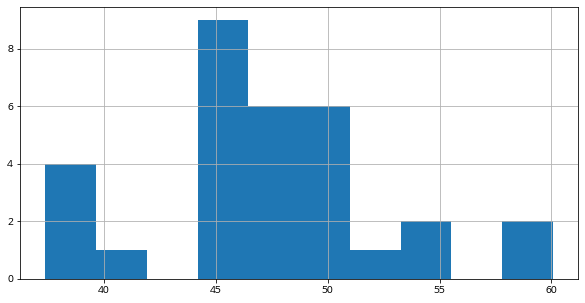

In [158]:
#혈당 산소 요구량
df_fitness["OXY"].hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77877f7190>,
      dtype=object)

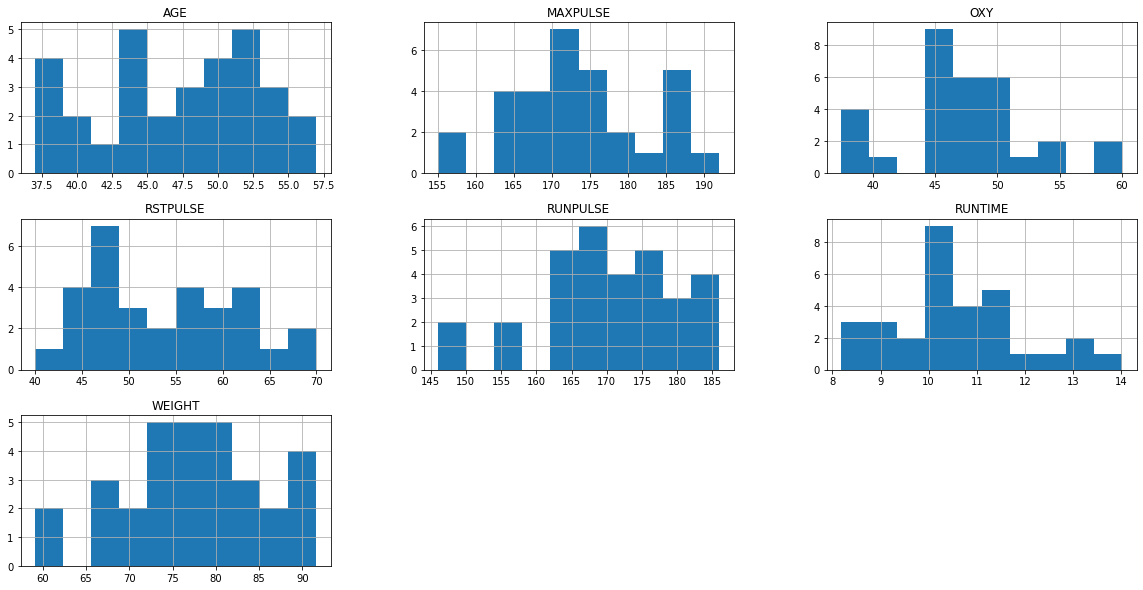

In [142]:
df_fitness.hist(figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7784376940>,
      dtype=object)

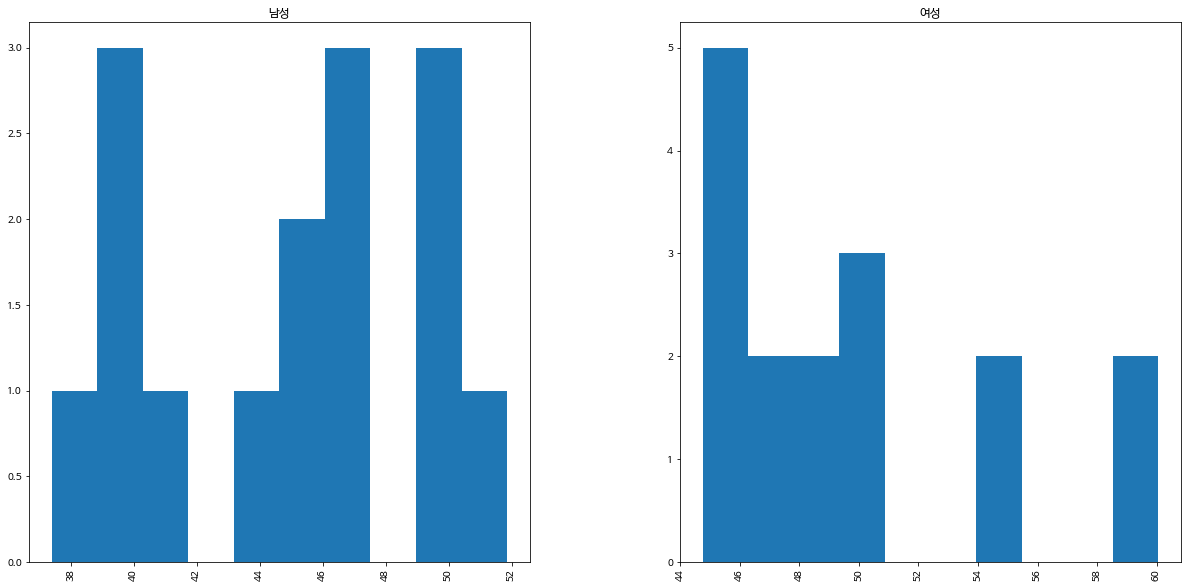

In [162]:
#성별 혈당 산소 요구량
df_fitness.hist(column="OXY",by="GENDER",figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7784442f10>,
      dtype=object)

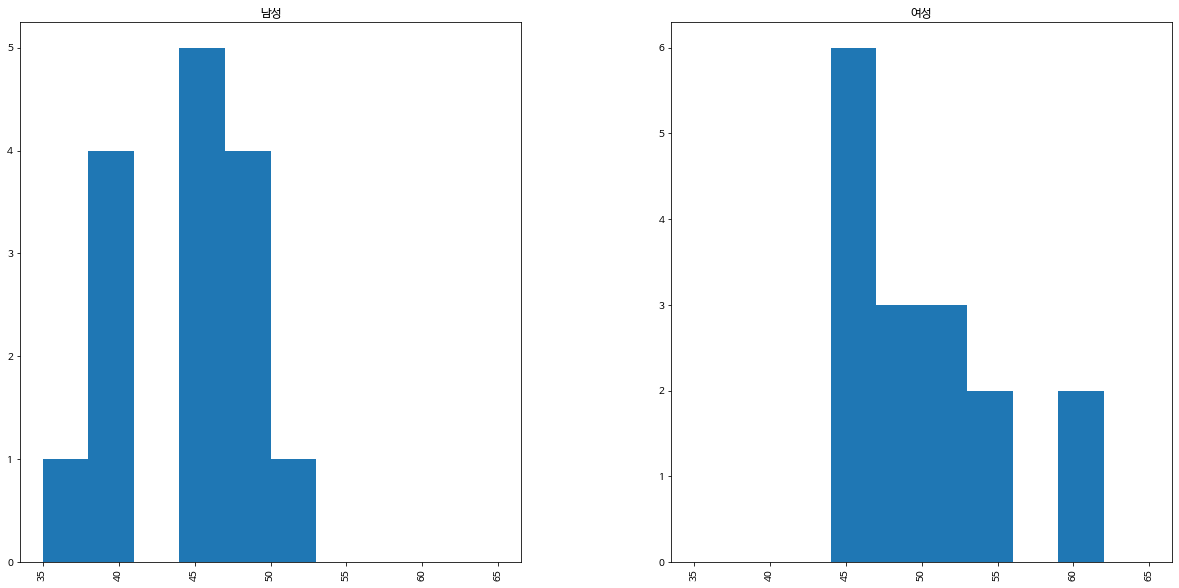

In [161]:
# 스케일 비교를 위해 범위 일치 
df_fitness.hist(column="OXY",by="GENDER",range=(35,65),figsize=(20,10))

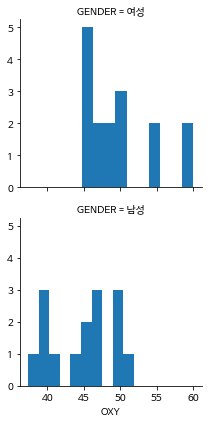

In [165]:
#성별 혈당 산소 요구량 중첩
grid=sns.FacetGrid(df_fitness, "GENDER")
grid.map(plt.hist,"OXY")

Text(0.5, 1.0, '여성 vs. 남성, 혈당 산소 요구량')

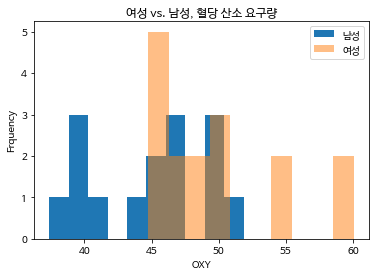

In [166]:
# matplotlib.pyplot.hist -> method 이용하여 중첩 histogram 그리기
# hist(변수, label="표시 값", alpha=투명도 (0~1))
# Histogram 중첩 생성 
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label="남성", alpha=1)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label="여성", alpha=0.5)
plt.legend()
plt.xlabel("OXY")
plt.ylabel("Frquency")
plt.title("여성 vs. 남성, 혈당 산소 요구량")
# 남성은 혈당 산소 요구량이 낮은 수준에서, 여성은 높은 수준에서 높은 빈도를 인다. 

(array([ 5.,  3., 12.,  7.,  2.,  2.]),
 array([37.388     , 41.16583333, 44.94366667, 48.7215    , 52.49933333,
        56.27716667, 60.055     ]),
 <a list of 6 Patch objects>)

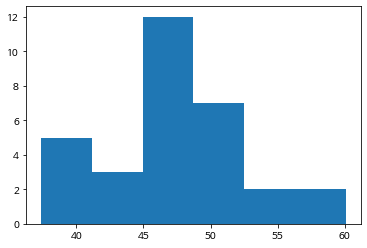

In [169]:
# Histogram 생성 : X축의 구간(bin)수를 변경 
plt.hist(x="OXY", data=df_fitness, bins=6)

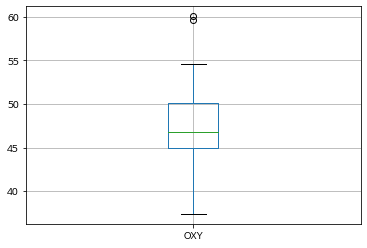

In [170]:
# 그래프 분석_box plot 
df_fitness.boxplot(column="OXY")

In [171]:
df_fitness[(df_fitness["OXY"]>55)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186


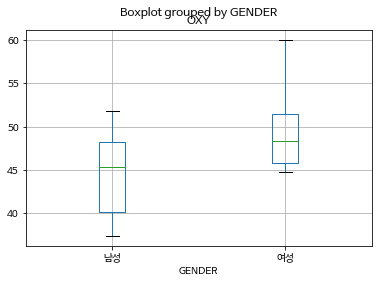

In [172]:
# (column=변수, by)
df_fitness.boxplot(column="OXY", by="GENDER")

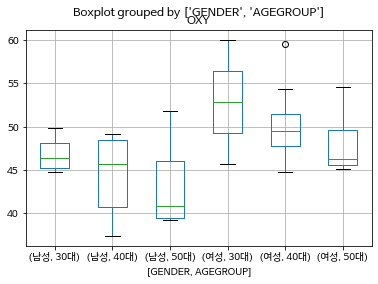

In [176]:
# 성별+연령대
df_fitness.boxplot(column="OXY", by=["GENDER","AGEGROUP"])

# 3. PIECHART
#### 범주형 데이터 : 비율로 비교할 때 많이 사용한다. 

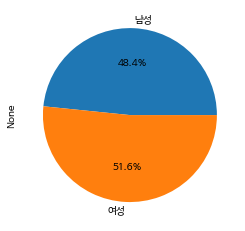

In [179]:
#성별 Pie Chart
# groupby(column): column 기준 자료 요약 (size : group별 자료 수)
df_count=df_fitness.groupby(["GENDER"]).size()
# pie(데이터, labels=레이블 변수 지정, autopct=비율%로 표시 (%.1f%%:소수점 1자리 적용)
df_count.plot.pie(y="OXY", autopct="%.1f%%")

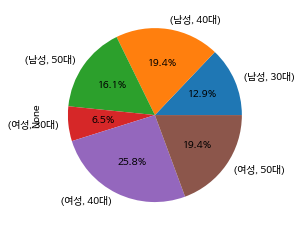

In [180]:
# 성별+연령대 Pie Chart 
df_count=df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")

# 4. Scatter plot 
#### 회귀분석, 상관분석 할 때 사전에 봐야 한다. 

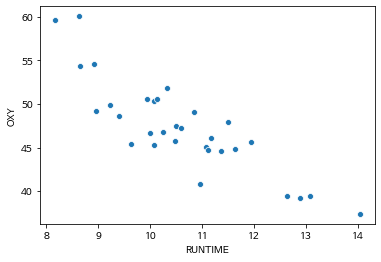

In [181]:
# seaborn.scatterplot method이용 
sns.scatterplot(x='RUNTIME', y='OXY',data=df_fitness)

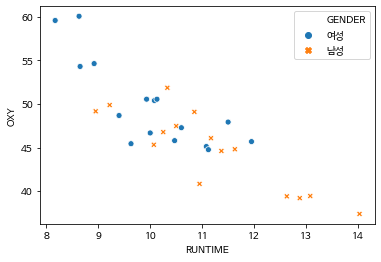

In [182]:
# seaborn.scatterplot method 이용 (x,y,data) : 성별 산점도
# sns.scatterplot(x=, y=,hue=groupby,style=구분기준 ,data=df_fitness)
sns.scatterplot(x='RUNTIME', y='OXY',hue="GENDER",style="GENDER",data=df_fitness)

# Scatter Matrix 

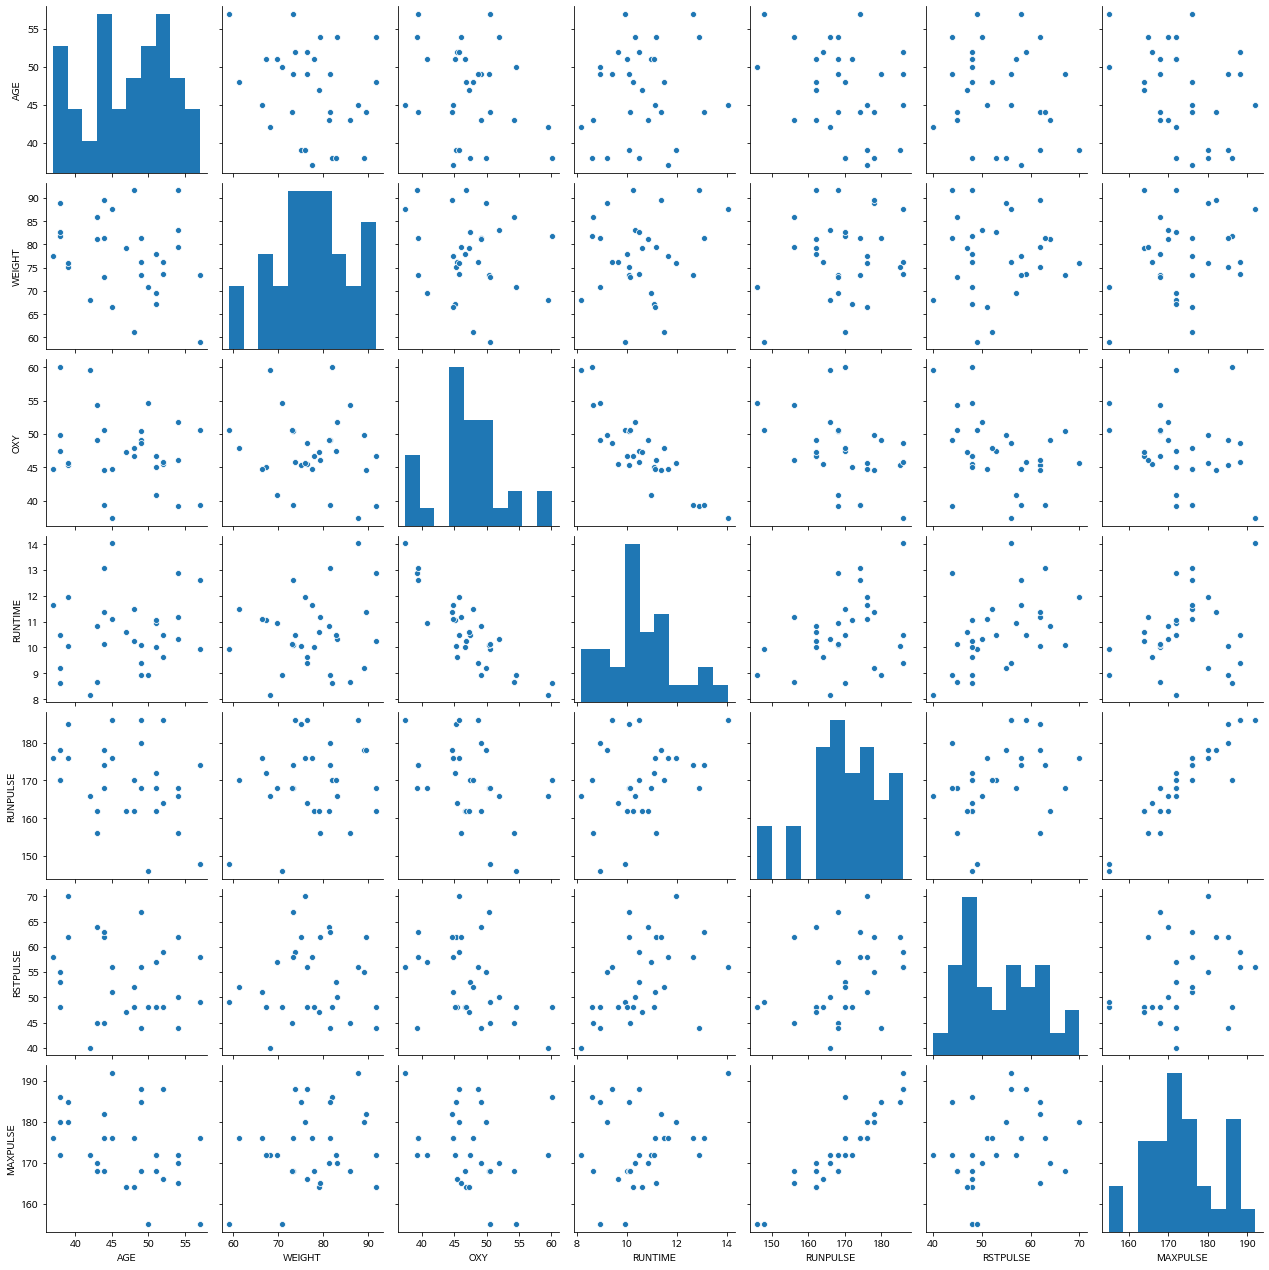

In [183]:
sns.pairplot(df_fitness) #한꺼번에 관계를 볼 때 

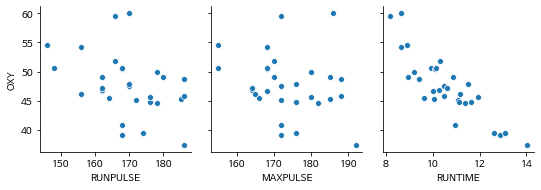

In [184]:
# 요구되는 것만 
sns.pairplot(y_vars=["OXY"], x_vars=["RUNPULSE","MAXPULSE","RUNTIME"],data=df_fitness)

# Trend Chart 
#### X축(시간, 가격 등 숫자형 자료)의 변화에 따른 Y값의 변화, 추세를 표현하는 그래프 (시계열 변화) 

In [189]:
df_cur=pd.read_csv("/home/piai/Downloads/3/환율.csv", engine='python',encoding='cp949', parse_dates=['APPL_DATE'])
df_cur.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [190]:
# 데이터의 타입을 체크 (명목형 변수 : Obje
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CURRENCY       273 non-null    object        
 1   APPL_DATE      273 non-null    datetime64[ns]
 2   STD_RATE       273 non-null    float64       
 3   USD_CONV_DATE  273 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.7+ KB


In [194]:
# pivot(index, columnes, values) 활용하여 각국 통화별 데이터 생성
df_cur_pivot=df_cur.pivot(index='APPL_DATE', columns='CURRENCY',
                              values='STD_RATE')
df_cur_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


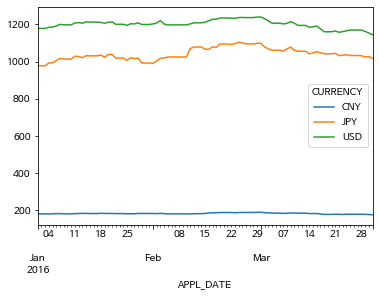

In [195]:
df_cur_pivot.plot() # CNY의 경우 scale 때문에 변동을 알기 어렵다. 

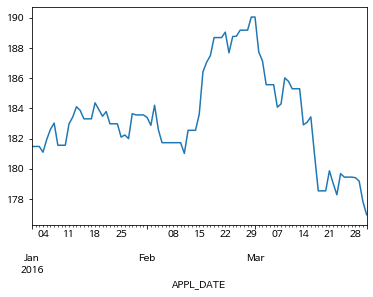

In [196]:
# 중국 위안화 별도로 그림 
df_cur_pivot["CNY"].plot()

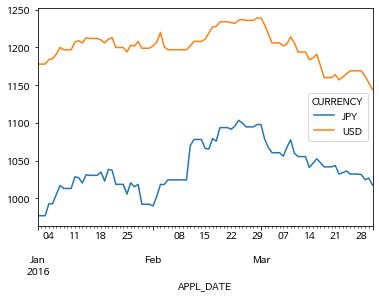

In [199]:
df_cur_pivot[["JPY","USD"]].plot()

# Heatmap

In [231]:
df_fitness.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,44,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56,192


In [218]:
df_agg=df_fitness.groupby(["GENDER","AGEGROUP"], as_index=False). agg("mean")
df_agg

,GENDER,AGEGROUP,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,남성,30대,38.000000,81.080000,46.866250,10.355000,177.250000,57.000000,178.250000
1,남성,40대,45.500000,85.465000,44.410000,11.421667,173.666667,56.166667,178.166667
2,남성,50대,54.000000,79.426000,43.476200,11.592000,166.400000,54.200000,171.000000
3,여성,30대,38.500000,78.925000,52.868000,10.290000,173.000000,59.000000,183.000000
4,여성,40대,45.875000,72.943750,50.427125,9.956250,169.000000,50.375000,172.500000
5,여성,50대,52.166667,70.856667,48.031833,10.005000,163.000000,50.000000,167.333333


In [212]:
df_pivot=df_agg.pivot("GENDER","AGEGROUP","OXY")
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


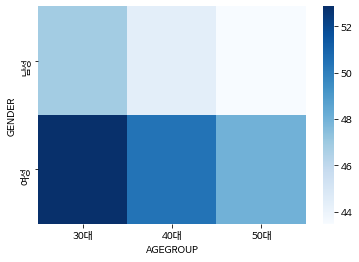

In [217]:
sns.heatmap(df_pivot, cmap="Blues") # Blues, Accent_r, coolwarm_r, magma_r

# Countour Plot 
#### 자료의 분포 밀도, 변화 및 패턴 확인 

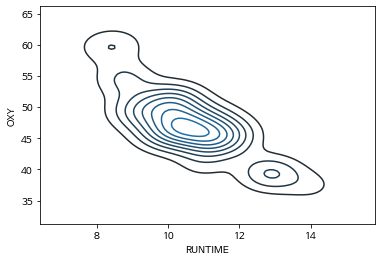

In [220]:
# kdeplrt (x축, y축, shade : 음영 선택 여부 )
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade=False)

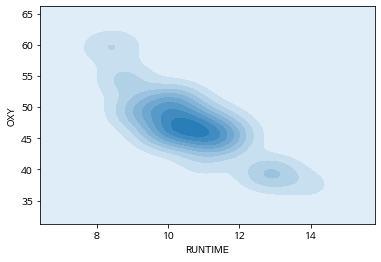

In [221]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade=True)

# 10. Parrel Plot 
#### 성별에 따른  혈당 산소요구량, 몸무게, 그리고 휴식시와 운동시 맥박 수의 수변화관계 

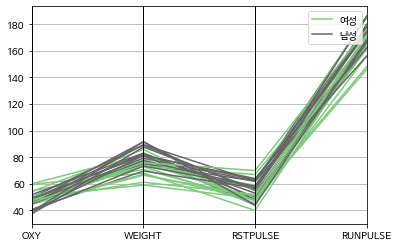

In [228]:
# parrallel_coordinates (데이터, 그룹 변수, cols=변수,)
# colormap=다양한 colormap지정 : cool, Accent, prism, rainbow
pd.plotting.parallel_coordinates(df_fitness, "GENDER", \
                                cols=['OXY',"WEIGHT","RSTPULSE","RUNPULSE"],\
                                colormap="Accent")

# 11.Customizing : 운동에 따른 혈당 산소 요구량 데이터 
#### 그래프 결과의 가독성 향상을 위해 그래프의 속성을 변경하거나 Dashbord 등을 구성하여 그래프 정보를 종합적으로 표현하는 작업 

Text(486.9227272727271, 0.5, '혈당 산소 요구량')

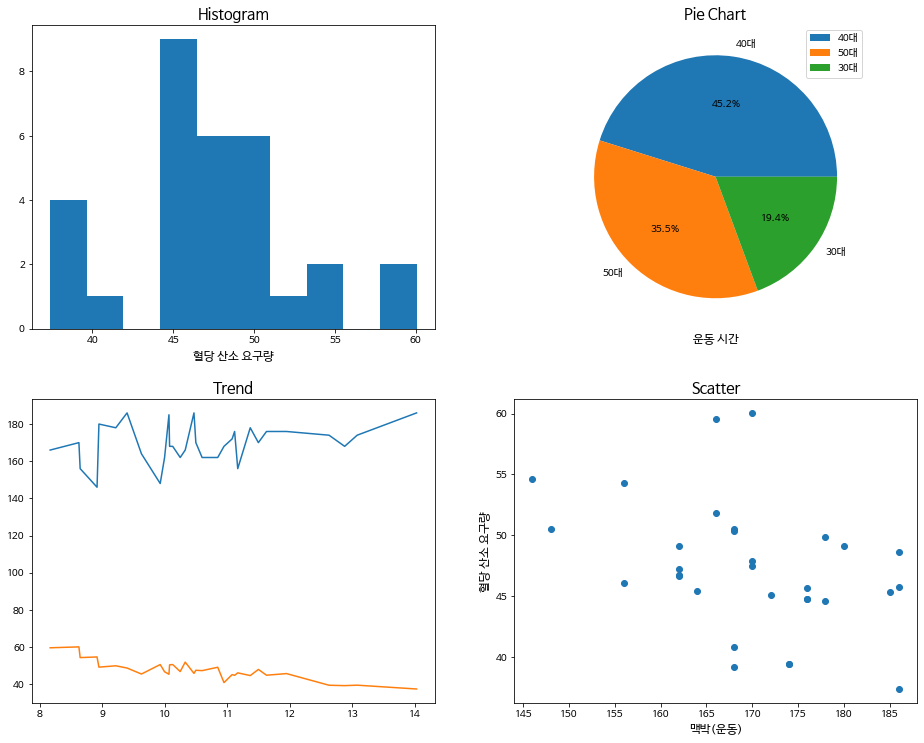

In [234]:
df_count=df_fitness["AGEGROUP"].value_counts()
# 4개의 그래프 생성
fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(13,10))
# w_pad: 열 사이 간격, h_pad: 행 사이 간격
plt.tight_layout(w_pad=5, h_pad=5)
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct="%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)

axes[1,0].plot("RUNTIME","RUNPULSE", data=df_fitness, label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY", data=df_fitness, label="혈당산소요구량")
axes[1,0].set_title("Trend",fontsize=15)
axes[0,1].set_xlabel("운동 시간", fontsize=12)
axes[0,1].legend()

axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)